In [1]:
import sys
sys.path.insert(0,"/Users/he/work/gwaslab/src")
import gwaslab as gl

# Loading data

In [2]:
mysumstats = gl.Sumstats("./hum0197.v3.BBJ.IS.v1/GWASsummary_IS_Japanese_SakaueKanai2020.auto.txt.gz",
                         snpid="v",
                         chrom="CHR",
                         pos="POS",
                         ea="Allele2",
                         nea="Allele1",
                         eaf="AF_Allele2",
                         beta="BETA",
                         se="SE",
                         p="p.value",
                         n="N")

Thu Oct 20 15:02:47 2022 Start to initiate from file :./hum0197.v3.BBJ.IS.v1/GWASsummary_IS_Japanese_SakaueKanai2020.auto.txt.gz
Thu Oct 20 15:03:48 2022  -Reading columns          : BETA,Allele2,SE,v,p.value,POS,Allele1,AF_Allele2,CHR,N
Thu Oct 20 15:03:48 2022  -Renaming columns to      : BETA,EA,SE,SNPID,P,POS,NEA,EAF,CHR,N
Thu Oct 20 15:03:48 2022  -Current dataframe shape  : Rows  13435541  x  10  Columns
Thu Oct 20 15:03:50 2022  -Initiating a status column ...
Thu Oct 20 15:03:53 2022  -Reordering columns to    : SNPID,CHR,POS,EA,NEA,EAF,BETA,SE,P,N,STATUS
Thu Oct 20 15:03:54 2022 Finished loading data successfully!


In [3]:
mysumstats.data

,SNPID,CHR,POS,EA,NEA,EAF,BETA,SE,P,N,STATUS
0,1:751343:T:A,1,751343.0,A,T,0.147779,-0.017831,0.015776,0.258357,174686,9999999
1,1:751756:T:C,1,751756.0,C,T,0.147315,-0.017782,0.015739,0.258548,174686,9999999
2,1:752566:G:A,1,752566.0,A,G,0.842680,0.016821,0.014585,0.248758,174686,9999999
3,1:752894:T:C,1,752894.0,C,T,0.849558,0.016973,0.015350,0.268854,174686,9999999
4,1:753405:C:A,1,753405.0,A,C,0.851400,0.017384,0.015630,0.266043,174686,9999999
...,...,...,...,...,...,...,...,...,...,...,...
13435536,X:154826774:G:A,X,154826774.0,A,G,0.772804,-0.012845,0.011680,0.271453,174686,9999999
13435537,X:154827160:T:C,X,154827160.0,C,T,0.772944,-0.012943,0.011698,0.268506,174686,9999999
13435538,X:154827280:T:C,X,154827280.0,C,T,0.773662,-0.012993,0.011714,0.267353,174686,9999999
13435539,X:154830377:C:T,X,154830377.0,T,C,0.771861,-0.013005,0.011801,0.270466,174686,9999999


# Plot mqq

Thu Oct 20 15:03:55 2022 Start to plot manhattan/qq plot with the following basic settings:
Thu Oct 20 15:03:55 2022  -Genome-wide significance level is set to 5e-08 ...
Thu Oct 20 15:03:55 2022  -Raw input contains 13435541 variants...
Thu Oct 20 15:03:55 2022  -Plot layout mode is : mqq
Thu Oct 20 15:04:06 2022 Finished loading specified columns from the sumstats.
Thu Oct 20 15:04:06 2022 Start conversion and sanity check:
Thu Oct 20 15:04:09 2022  -Removed 295098 variants with nan in CHR or POS column ...
Thu Oct 20 15:04:10 2022  -Removed 0 variants with nan in P column ...
Thu Oct 20 15:04:10 2022  -P values are being converted to -log10(P)...
Thu Oct 20 15:04:10 2022  -Sanity check after conversion: 0 variants with P value outside of (0,1] will be removed...
Thu Oct 20 15:04:13 2022  -Sanity check: 0 na/inf/-inf variants will be removed...
Thu Oct 20 15:04:16 2022  -Maximum -log10(P) values is 17.700724514489742 .
Thu Oct 20 15:04:16 2022 Finished data conversion and sanity check

(<Figure size 1500x500 with 2 Axes>, <gwaslab.Log.Log at 0x7fe5f92e5cd0>)

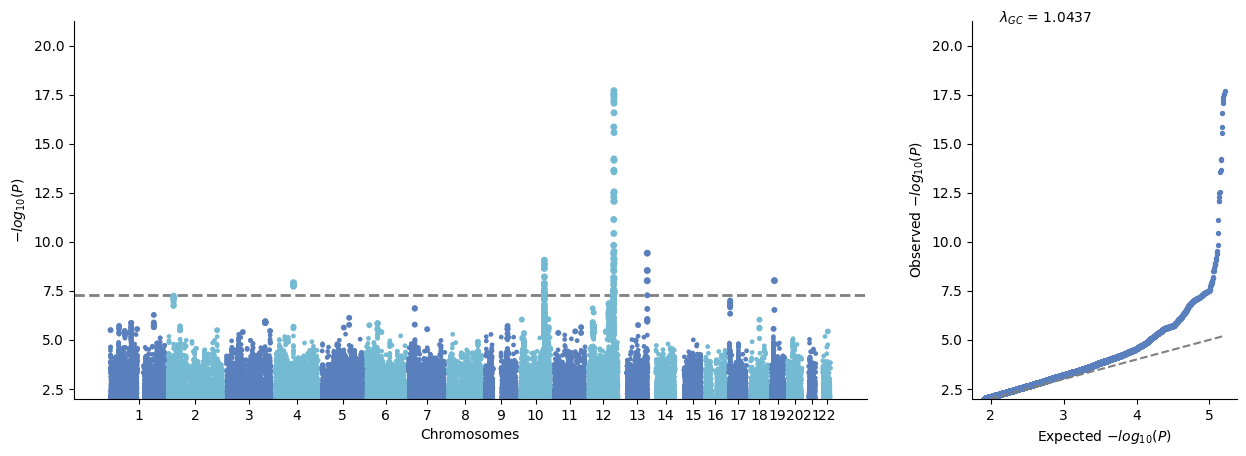

In [4]:
mysumstats.plot_mqq(skip=2)

# Sampling

since it might take a while to process the entire datasets, let us just random sample 1 million variants for this tutorial

In [5]:
mysumstats.random_variants(n=1000000)

Thu Oct 20 15:04:20 2022  -Start to romdomly select variants from the sumstats...
Thu Oct 20 15:04:22 2022  -Finished sampling...


# Standardization & QC : basic_check()

In [6]:
#check SNPID,rsID,CHR,POS,EA and NEA

In [7]:
mysumstats.basic_check()

Thu Oct 20 15:04:22 2022 Start to check IDs...
Thu Oct 20 15:04:22 2022  -Current Dataframe shape : 1000000  x  11
Thu Oct 20 15:04:22 2022  -Checking if SNPID is chr:pos:ref:alt...(separator: - ,: , _)
Thu Oct 20 15:04:27 2022 Finished checking IDs successfully!
Thu Oct 20 15:04:27 2022 Start to fix chromosome notation...
Thu Oct 20 15:04:27 2022  -Current Dataframe shape : 1000000  x  11
Thu Oct 20 15:04:32 2022  -Vairants with fixable chromosome notations: 22119
Thu Oct 20 15:04:32 2022  -Converting to string datatype and UPPERCASE...
Thu Oct 20 15:04:32 2022  -Stripping chr prefix if exists : CHR_-.0...
Thu Oct 20 15:04:32 2022  -Identified  22119  variants on sex chromosomes...
Thu Oct 20 15:04:33 2022  -Standardizing sex chromosome notations: X Y MT  to 23,24,25...
Thu Oct 20 15:04:37 2022  -No unrecognized chromosome notations...
Thu Oct 20 15:04:37 2022 Finished fixing chromosome notation successfully!
Thu Oct 20 15:04:37 2022 Start to fix basepair positions...
Thu Oct 20 15:04

# Infer genome build

In [8]:
# In case you don't know the genome build of the sumstats 

In [9]:
mysumstats.infer_build()

Thu Oct 20 15:04:49 2022  -Start to infer genome build version using hapmap3 SNPs...
Thu Oct 20 15:04:49 2022  -Loading Hapmap3 variants data...
Thu Oct 20 15:04:52 2022  -chr:pos will be used for matching...
Thu Oct 20 15:04:58 2022  -Matching variants for hg19: num_hg19= 79806
Thu Oct 20 15:04:58 2022  -Matching variants for hg38: num_hg38= 1184
Thu Oct 20 15:04:58 2022  -Since num_hg19>num_hg38, assigning genome build hg19...


# Extract lead variants : get_lead()

In [10]:
# extract lead variants

In [11]:
mysumstats.get_lead(anno=True)

Thu Oct 20 15:05:00 2022 Start to extract lead variants...
Thu Oct 20 15:05:00 2022  -Processing 1000000 variants...
Thu Oct 20 15:05:00 2022  -Significance threshold : 5e-08
Thu Oct 20 15:05:00 2022  -Sliding window size: 500  kb
Thu Oct 20 15:05:01 2022  -Found 9 significant variants in total...
Thu Oct 20 15:05:01 2022  -Identified 3 lead variants!
Thu Oct 20 15:05:01 2022 Start to annotate variants with nearest gene name(s)...
Thu Oct 20 15:05:01 2022  -Assigning Gene name using built-in Ensembl Release 75  (hg19)
Thu Oct 20 15:05:01 2022 Finished annotating variants with nearest gene name(s) successfully!
Thu Oct 20 15:05:01 2022 Finished extracting lead variants successfully!


,SNPID,CHR,POS,EA,NEA,EAF,BETA,SE,P,N,STATUS,LOCATION,GENE
8503457,10:105458033:G:C,10,105458033,C,G,0.419202,0.061824,0.011098,2.535870e-08,174686,1960099,0,SH3PXD2A
9863045,12:111353556:A:G,12,111353556,G,A,0.213896,-0.072292,0.013097,3.399216e-08,174686,1960099,0,MYL2
9865482,12:112468206:C:T,12,112468206,T,C,0.242399,-0.120570,0.013845,3.080831e-18,174686,1960099,0,NAA25


# Harmonise

In [12]:
#ref_seq : reference genome fasta file for allele alignment
#ref_rsid_tsv : tsv file for annotation of common used variants
#ref_rsid_vcf : vcf file for annotation of other variants
#ref_infer : vcf file with allele frequency information for inferring strand and comparing allele frequency 
#ref_alt_freq : field in INFO of vcf file for alternative allele frequency

In [13]:
# let try with only 10k varinats
mysumstats.random_variants(n=10000)

Thu Oct 20 15:05:01 2022  -Start to romdomly select variants from the sumstats...
Thu Oct 20 15:05:01 2022  -Finished sampling...


In [14]:
mysumstats.harmonize(basic_check=False,
                    n_cores=3,
                    ref_seq="/Users/he/Documents/Mydata/human_g1k_v37.fasta",
                    ref_rsid_tsv="/Users/he/Documents/Mydata/EAS_1kg_af_dbsnp151.ALL.tsv",
                    ref_rsid_vcf="/Users/he/Documents/Mydata/All_20180423.vcf.gz",
                    ref_infer="/Users/he/Documents/Mydata/eas_1kg_af/EAS.ALL.split_norm_af.1kgp3v5.hg19.vcf.gz",ref_alt_freq="AF")

Thu Oct 20 15:05:01 2022 Start to check if NEA is aligned with reference sequence...
Thu Oct 20 15:05:01 2022  -Current Dataframe shape : 10000  x  11
Thu Oct 20 15:05:01 2022  -Reference genome fasta file: /Users/he/Documents/Mydata/human_g1k_v37.fasta
Thu Oct 20 15:05:01 2022  -Checking records: 1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  X  Y  MT  
Thu Oct 20 15:05:42 2022  -Variants allele on given reference sequence :  9416
Thu Oct 20 15:05:42 2022  -Variants flipped :  0
Thu Oct 20 15:05:42 2022   -Raw Matching rate :  94.16%
Thu Oct 20 15:05:42 2022  -Variants inferred reverse_complement :  0
Thu Oct 20 15:05:42 2022  -Variants inferred reverse_complement_flipped :  0
Thu Oct 20 15:05:42 2022  -Both allele on genome + unable to distinguish :  584
Thu Oct 20 15:05:42 2022  -Variants not on given reference sequence :  0
Thu Oct 20 15:05:42 2022  -Current Dataframe shape : 10000  x  11
Thu Oct 20 15:05:42 2022 Finished converting successfully!
Thu

In [15]:
mysumstats.data

,SNPID,rsID,CHR,POS,EA,NEA,EAF,BETA,SE,P,N,STATUS
0,1:1026801:T:A,rs4562563,1,1026801,A,T,0.895210,-0.002791,0.019808,0.887959,174686,1960001
1,1:1064802:T:C,rs2298216,1,1064802,C,T,0.566247,-0.019778,0.010907,0.069776,174686,1960000
2,1:1753768:T:C,<NA>,1,1753768,C,T,0.000989,0.216472,0.191516,0.258346,174686,1960000
3,1:1904910:G:A,rs3795285,1,1904910,A,G,0.078082,0.047240,0.022542,0.036117,174686,1960000
4,1:2823506:A:T,rs897630,1,2823506,T,A,0.346303,0.001145,0.011233,0.918823,174686,1960001
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,X:150789799:A:G,rs748844491,23,150789799,G,A,0.000032,-0.863081,1.017164,0.396150,174686,1960000
9996,X:150969738:G:A,rs58830928,23,150969738,A,G,0.531984,0.003827,0.008960,0.669297,174686,1960000
9997,X:152081432:G:T,rs5925254,23,152081432,T,G,0.663000,-0.000479,0.008905,0.957143,174686,1960000
9998,X:152784720:G:A,<NA>,23,152784720,A,G,0.003089,-0.086943,0.090208,0.335141,174686,1960000


In [16]:
mysumstats.summary()

Values  Percentage
Category Items                                                   
META     Row_num                                10000         NaN
         Column_num                                 6         NaN
         Column_names       SNPID,rsID,EAF,P,N,STATUS         NaN
         Last_checked_time   Thu Oct 20 15:11:08 2022         NaN
MISSING  Missing_total                            573        5.73
         Missing_rsID                             573        5.73
MAF      Common                                  4169       41.69
         Low_frequency                           1517       15.17
         Rare                                    4314       43.14
P        Minimum                 1.95849488673265e-06        0.00
         Significant                                0        0.00
         Suggestive                                 1        0.01
STATUS   1960000                                 7950       79.50
         1960001                                 1061       10.61
         1960363                                  409        4.09
         1960008                                  248        2.48
         1960368                                  175        1.75
         1960007                                  111        1.11
         1960309                                   43        0.43
         1980609                                    3        0.03

# Formatting and saving : to_format()

In [17]:
mysumstats.to_format("clean_sumstats",fmt="ldsc")

Thu Oct 20 15:11:08 2022 Start to format the output sumstats in:  ldsc  format
Thu Oct 20 15:11:08 2022  -Formatting statistics ...
Thu Oct 20 15:11:08 2022  - Float statistics formats:
Thu Oct 20 15:11:08 2022   - Columns: ['EAF', 'BETA', 'SE', 'P']
Thu Oct 20 15:11:08 2022   - Output formats: ['{:.4g}', '{:.4f}', '{:.4f}', '{:.4e}']
Thu Oct 20 15:11:08 2022  - Start outputting sumstats in ldsc format...
Thu Oct 20 15:11:08 2022  -ldsc format will be loaded...
Thu Oct 20 15:11:08 2022  -ldsc format meta info:
Thu Oct 20 15:11:08 2022   - format_name  :  ldsc
Thu Oct 20 15:11:08 2022   - format_source  :  https://github.com/bulik/ldsc/wiki/Summary-Statistics-File-Format
Thu Oct 20 15:11:08 2022   - format_source2  :  https://github.com/bulik/ldsc/blob/master/munge_sumstats.py
Thu Oct 20 15:11:08 2022   - format_version  :  20150306
Thu Oct 20 15:11:08 2022  -gwaslab to ldsc format dictionary:
Thu Oct 20 15:11:08 2022   - gwaslab keys: ['rsID', 'NEA', 'EA', 'N', 'BETA', 'P', 'INFO', 'OR